# Final Assignment MLiM - WS 20/21

Notebook contains:
- load data set & import packages
- lightGBM

### Import Packages

TO DO:

- Please reassign your corresponding paths
    - Set path where data sets are stored; newly created data sets will also be stored there
    - Set path to where the module is stored; this path will also be used to store the results
   

In [1]:
'TO DO: Please reassign your corresponding paths:'

#set path where data sets are stored
path_datasets = '/Users/Bisa/Documents/Studium/Masterstudium/5_Semester/MLiM/datasets'
#set path to where the module is stored
%cd '/Users/Bisa/Documents/Studium/Masterstudium/5_Semester/MLiM/FinalAssignment'

/Users/Bisa/Documents/Studium/Masterstudium/5_Semester/MLiM/FinalAssignment


In [2]:
import pandas as pd
import numpy as np
import time

import module_generate_dataset_new 
from module_generate_dataset_new import generate_dataset

import module_train_test_splitting
from module_train_test_splitting import train_test_splitting

import module_lightgbm
from module_lightgbm import lightgbm_model

import lightgbm as lgbm
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

### Load Data Set

**In case the data set are already loaded, proceed with code starting at 'Train-Test-Split'**

- Prerequisites: the following data frames are needed. They should be named:
    - baskets.parquet (downloaded)
    - coupons.parquet (downloaded)
    - df_negative_samples.parquet (created)
    - product_categories.csv (created)
    - avg_no_weeks_between_two_purchases.parquet (created)
    - lags.parquet (created)
    - purchase_temporal_distribution.parquet (created)


- Parameters: 
    - path (where data sets are stored)
    - train_start (first week that the training set should start with)
    - train_end (the last week the training set should end with)
    - test_start (analogously to train)
    - test_end (analogously to train)


- Output: 
    - one train data set
    - one test data set
    - both data sets are also stored as train_s2000_final.parquet and test_s2000_final.parquet in the pwd


- Table of Content:
    - Load Data Sets
    - Merge Data Sets
    - Feature Engineering Part I
    - Unit Test Block I
    - Train-Test-Split
    - Clear Memory
    - Feature Engineering Part II.a
    - Clear Memory
    - Feature Engineering Part III.a
    - Imputing/Fixing Missing Values
    - Unit Test Block II.a
    - Store data_train
    - Feature Engineering Part II.b
    - Clear Memory
    - Feature Engineering Part III.b
    - Imputing/Fixing Missing Values
    - Unit Test Block II.b
    - Store data_test
    - Unit Test Block III

In [3]:
#the module outputs two dataframes: the train and test dataset
#generate_dataset(path, train_start, train_end, test_start, test_end)
train, test = generate_dataset(path_datasets, 0, 88, 1, 89)

The dataframes should be named: 
baskets.parquet, 
coupons.parquet, 
df_negative_samples.parquet, 
product_categories.csv, 
avg_no_weeks_between_two_purchases.parquet, 
lags.parquet and 
purchase_temporal_distribution.parquet

Data sets (train and test) are generated and saved as a parquet file to: /Users/Bisa/Documents/Studium/Masterstudium/5_Semester/MLiM/datasets


In [4]:
train.head()

,week,shopper,product,price,discount,product_bought,category_label,avg_no_weeks_between_two_purchases,lag_weeks_of_product_per_customer,purchase_temporal_distribution,...,customer_prod_dis_offers,customer_prod_dis_share,customer_prod_dis_offered_share,customer_product_share,customer_mean_product_price,customer_discount_buy_share,week_basket_size,week_basket_value,mean_basket_size,mean_basket_value
0,0,0,5,504.7,30.0,0,12,-1.000000,-1.0,-1.000000,...,2,-1.0,0.0,-1.000000,587.203947,1.0,10.0,5908.0,8.978947,5271.6
1,0,0,16,743.0,0.0,0,13,15.500000,-1.0,45.000000,...,39,0.5,0.5,0.005263,587.203947,1.0,10.0,5908.0,8.978947,5271.6
2,0,0,27,407.4,30.0,0,4,-1.000000,-1.0,-1.000000,...,3,-1.0,0.0,-1.000000,587.203947,1.0,10.0,5908.0,8.978947,5271.6
3,0,0,35,391.3,35.0,0,9,-1.000000,-1.0,-1.000000,...,3,-1.0,0.0,-1.000000,587.203947,1.0,10.0,5908.0,8.978947,5271.6
4,0,0,52,607.0,0.0,0,7,9.111111,-1.0,38.555556,...,38,0.0,0.0,0.011842,587.203947,1.0,10.0,5908.0,8.978947,5271.6


In [5]:
test.head()

,week,shopper,product,price,discount,product_bought,category_label,avg_no_weeks_between_two_purchases,lag_weeks_of_product_per_customer,purchase_temporal_distribution,...,customer_prod_dis_offers,customer_prod_dis_share,customer_prod_dis_offered_share,customer_product_share,customer_mean_product_price,customer_discount_buy_share,week_basket_size,week_basket_value,mean_basket_size,mean_basket_value
0,1,0,5,468.65,35.0,0,12,-1.000000,-1.0,-1.000000,...,1,-1.000000,0.0,-1.000000,586.607895,1.0,7.0,4109.0,8.978947,5265.639474
1,1,0,34,635.40,10.0,0,9,-1.000000,-1.0,-1.000000,...,5,-1.000000,0.0,-1.000000,586.607895,1.0,7.0,4109.0,8.978947,5265.639474
2,1,0,56,570.75,25.0,0,14,23.666667,-1.0,39.000000,...,41,0.000000,0.0,0.003947,586.607895,1.0,7.0,4109.0,8.978947,5265.639474
3,1,0,71,629.00,0.0,1,23,1.303030,1.0,43.030303,...,72,0.030303,1.0,0.086842,586.607895,1.0,7.0,4109.0,8.978947,5265.639474
4,1,0,81,513.00,0.0,0,21,6.666667,-1.0,44.666667,...,29,0.000000,0.0,0.003947,586.607895,1.0,7.0,4109.0,8.978947,5265.639474


### Train-Test-Split

In [6]:
#parameter are path, train_start, train_end, test_start, test_end, eval_set == True)

X_train, X_test, X_eval, y_train, y_eval, y_test = train_test_splitting(path_datasets, 0, 87, 89, 89, eval_set = True)

The following features will be removed from the training data sets (besides the target variable product_bought): 
shopper, 
product, 
purchase_w/o_dis, 
no_purchase_w_dis, 
discount_effect, 
week_basket_size and 
week_basket_value. 
Among others, reasons are target leakage and non-reproducibility for week 90.
Training Observations: 3501004
Evaluation Observations: 39794
Testing Observations: 39535
Observations: 3580333


### LightGBM

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[5]	training's binary_logloss: 0.647592	training's auc: 0.87	valid_1's binary_logloss: 0.64773	valid_1's auc: 0.86801	valid_2's binary_logloss: 0.647374	valid_2's auc: 0.867346
defaultdict(<class 'collections.OrderedDict'>, {'training': OrderedDict([('binary_logloss', 0.6475918564064014), ('auc', 0.8699997687213666)]), 'valid_1': OrderedDict([('binary_logloss', 0.6477299542630544), ('auc', 0.8680102934112931)]), 'valid_2': OrderedDict([('binary_logloss', 0.6473743830436293), ('auc', 0.8673459832568764)])})

The computation took 0.17 minutes.


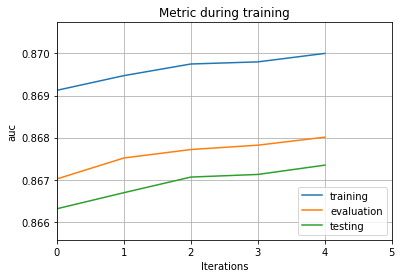

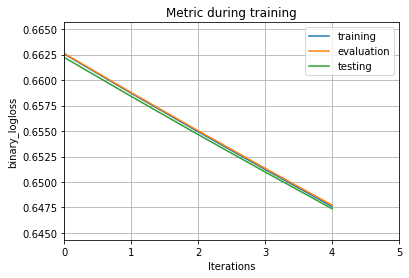

Confusion Matrix: 
 [[24342     0]
 [15193     0]]
The AUC score is:  0.8673459832568764
The Binary_Log_Loss is:  0.6473743830436139


In [7]:
#parameters are X_train, X_test, y_train, y_test, X_eval = None, y_eval = None, eval_set = True, output_probabilities = True, n_estimators = 300, early_stopping_rounds = 50, reg_alpha = 0.3, subsample = 0.5, learning_rate = 0.01, 
#max_depth = 8, verbose = 200. All parameter that is not specified here are the default parameters of the lightgbm model

y_pred = lightgbm_model(X_train, X_test, y_train, y_test, X_eval, y_eval, eval_set = True, output_probabilities = True, n_estimators = 5, early_stopping_rounds = 50)

### Final prediction

In [10]:
#TO DO: unit tests for final prediction

#data for final prediction (shopper, week, coupon, product, discount)
pred_coup = pd.read_parquet(path_datasets + '/coupon_index.parquet')
pred_coup

,week,shopper,coupon
0,90,0,0
2000,90,0,1
4000,90,0,2
6000,90,0,3
8000,90,0,4
...,...,...,...
1999,90,1999,0
3999,90,1999,1
5999,90,1999,2
7999,90,1999,3
